In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt




In [2]:
df = pd.read_csv('Property Value Sales 2020.csv')



In [3]:
#preparing data
df = df.dropna().replace([np.inf, -np.inf], np.nan).dropna()


df = df.fillna(df.mean()).replace([np.inf, -np.inf], np.nan).dropna()


<ipython-input-3-14953ffb7447>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean()).replace([np.inf, -np.inf], np.nan).dropna()


In [ ]:



X = df[['transit_score', 'bike_score', 'price', 'walkscore', 'sq ft']]
y = df['Metro']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)

# SVM 
svm = SVC(kernel='linear', C=1.0, random_state=42, cache_size=7000)
svm.fit(X_train, y_train.values.ravel())
y_pred_svm = svm.predict(X_test)


#accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

#print("Accuracy of K-means model: {:.2f}%".format(accuracy_kmeans * 100))
print("Accuracy of SVM model: {:.2f}%".format(accuracy_svm * 100))


In [4]:
#knn


X = df[['transit_score', 'bike_score', 'price', 'walkscore', 'sq ft']]
y = df['Metro']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.4837799717912553


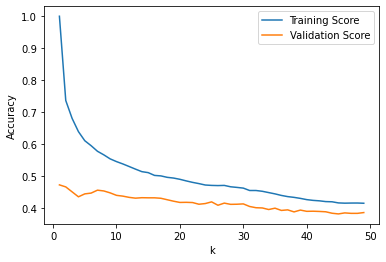

Best value of k: 1
Accuracy: 0.4767277856135402


In [8]:
#hyperparamater tuning with gridserachcv (from scikit)

X = df[['transit_score', 'bike_score', 'price', 'walkscore', 'sq ft']]
y = df['Metro']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {'n_neighbors': np.arange(1, 50)}


grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

# visualizing hyperparameter tuning
param_range = np.arange(1, 50)
train_scores, test_scores = grid_search.cv_results_['mean_train_score'], grid_search.cv_results_['mean_test_score']
plt.plot(param_range, train_scores, label='Training Score')
plt.plot(param_range, test_scores, label='Validation Score')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#returning best paramaters
best_k = grid_search.best_params_['n_neighbors']
print('Best value of k:', best_k)

#training model with returned parmaters
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


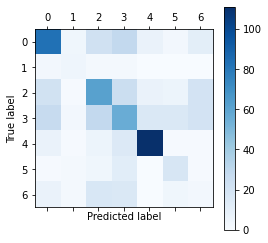

In [6]:
#making visualization of confusion matrix (using confusion_matrix from scikit)
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.matshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()